<a href="https://colab.research.google.com/github/RonnyGuevara/Digital-image-processing/blob/main/PT2/Pr%C3%A1ctica_2_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2:  Color y espacios cromáticos, manipulación de la luminancia y saturación
## Objetivo General
Manipulación independiente de la luminancia y saturación de una imagen
## Objetivos Especificos
*   Conocer las librerías imageio, numpy y matplotlib.pyplot 
*   Conversión de espacios RGB y YIQ mediante matrices 

###1. Importación de librerías

In [ ]:
import imageio
import io
import numpy as np
import os
import matplotlib.pyplot as plt

###2. Incluiremos Drive en el trabajo
Incluido el drive en el trabajo procedemos a leer la imagen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
image=imageio.imread('/content/drive/MyDrive/Colab Notebooks/loro.jpg')#Lectura de la imagen

Mounted at /content/drive


###3. Interacción con el usuario
Utilizaremos un botón scroll para que el usuario seleccione el valor de ØY y/o ßIQ, siendo:

*   ØY: coeficiente de luminancia
*   ßIQ: coeficiente de saturación



In [ ]:
ØY = 1 #@param {type:"slider", min:-2, max:2, step:0.1}
ßIQ = 0 #@param {type:"slider", min:-2, max:2, step:0.1}

###4. Conversión de espacios
Utilizaremos 3 matrices para la transformación entre el espacio RGB y el IAQ, la tercera matriz almacenará los coeficientes de luminancia y saturación elegido por el usuario

In [ ]:
matrixYIQ=np.array([[0.299,0.587,0.144],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
matrixRGB=np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
matrixcoeff=np.array([[ØY,0,0],[0,ßIQ,0],[0,0,ßIQ]])

###5. Visualización
Para graficar las imagenes correspondientes se hara uso de la librería matplotlib.pyplot y se muestra:


Imagen Original 

1.   Imagen Original 
2.   Imagen normalizada [0,1] en el espacio RGB
3.   Imagen transformada al espacio YIQ
4.   Imagen resultante producto de la manipulación de la luminancia y saturación


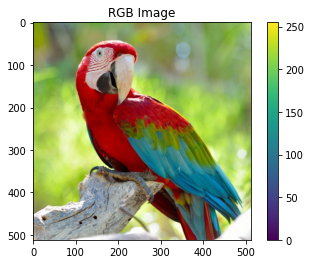

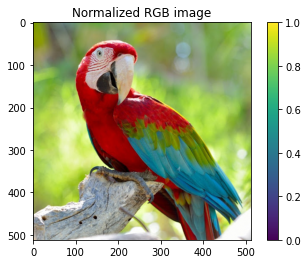

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


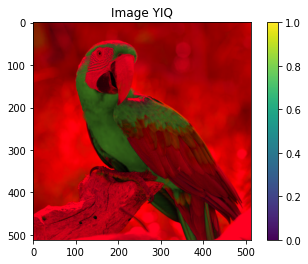

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


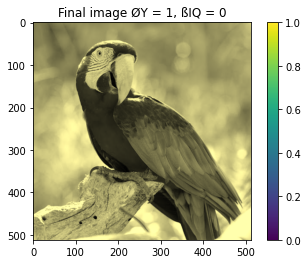

In [ ]:
#print (image) #Permite visualizar la matriz de la imagen
plt.figure()
plt.title('RGB Image')
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

#Normalización de valores RGB
imagecopy=image/255
#print (imagecopy) #Permite visualizar la matriz de la imagen
plt.figure()
plt.title('Normalized RGB image')
plt.imshow(imagecopy)
plt.colorbar()
plt.grid(False)
plt.show()

#Multiplicación de la matriz YIQ por los coeficientes de luminancia y saturación
YIQ=np.dot(imagecopy,matrixYIQ)
#print (YIQ) #Permite visualizar la matriz de la imagen
plt.figure()
plt.title('Image YIQ')
plt.imshow(YIQ,vmax=1, vmin=0)
plt.colorbar()
plt.grid(False)
plt.show()

#Cambio de luminancia y/o saturación de la imagen
imagecopy1=np.copy(YIQ)
YIQ2=np.dot(imagecopy1,matrixcoeff)
#print(YIQ2) #Permite visualizar la matriz de la imagen

#Transformación de l espacio YIQ a RGB
imagecopy2=np.dot(YIQ2,matrixRGB)
#print(loro4) #Visualización de la matriz
plt.figure()
plt.title(f"Final image ØY = {str(ØY)}, ßIQ = {str(ßIQ)}")
plt.imshow(imagecopy2)
plt.colorbar()
plt.grid(False)
plt.show()


#6. Resultados


*   El trabajo práctico permite el ingreso de los coeficientes de luminancia y saturación por parte del usuario, si el coeficiente de luminancia es mayor a 1 el brillo de la imagen aumenta, mientras que, si el coeficiente es menor a 1 el brillo disminuye.
*   El coeficiente de saturación permite manipular la pureza del color dentro de la imagen, si el coeficiente es igual a cero la imagen se convierte a escala de grises.





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


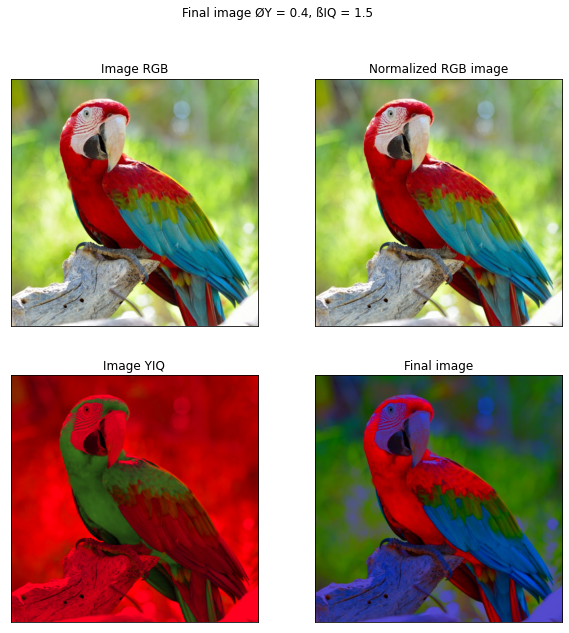

In [ ]:
titles=['Image RGB', 'Normalized RGB image', 'Image YIQ', 'Final image']
images=[image, imagecopy,YIQ, imagecopy2]
plt.figure(figsize=(10,10))
plt.tight_layout()

for i in range (4):
  
  plt.subplot(2,2, i+1)
  plt.imshow(images[i])
  plt.title(titles[i])
  plt.xticks([])
  plt.yticks([])

plt.suptitle(f"Final image ØY = {str(ØY)}, ßIQ = {str(ßIQ)}")
plt.show()

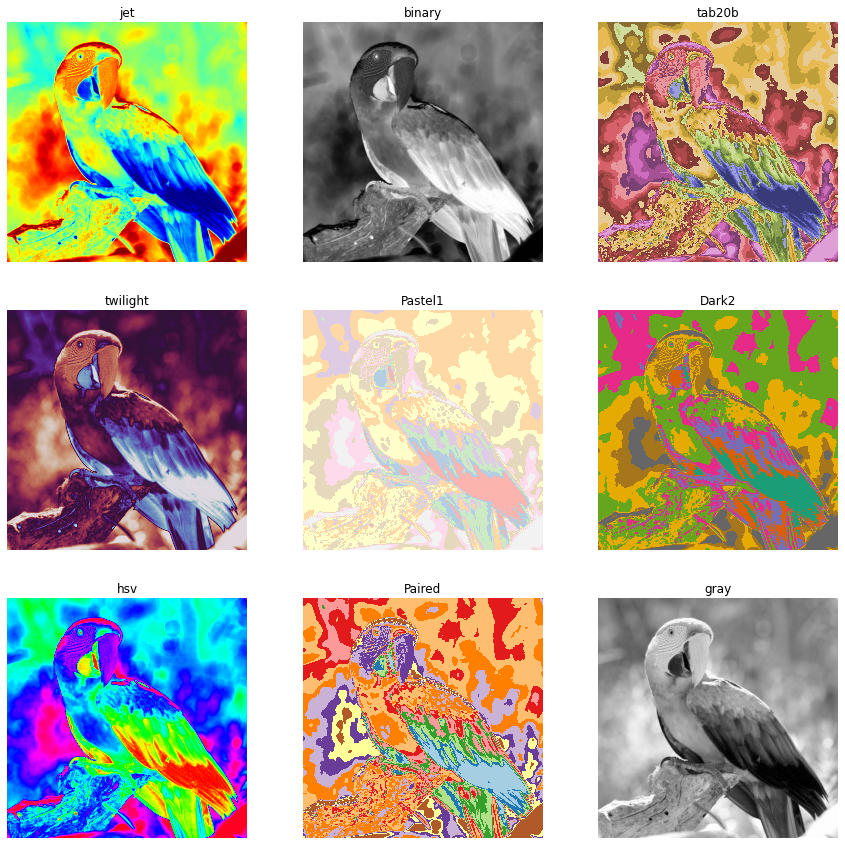

In [ ]:
imagegray=image[:,:,0]

fig,axes=plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(15,15))
cmaps=['jet', 'binary', 'tab20b', 'twilight', 'Pastel1', 'Dark2', 'hsv','Paired','gray']

for ax, cmap in zip(axes.flat, cmaps):
  
  ax.imshow(imagegray, cmap=cmap)
  ax.set(title=cmap)
  ax.axis('off')

plt.show()